In [29]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Any
import seaborn as sns
from matplotlib.axes import Axes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
mvid = pd.read_csv("data/MVID_101001_171001.txt")
sber = pd.read_csv("data/SBER_101001_171001.txt")

In [3]:
mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,MVID,D,20101001,0,194.38,19406
1,MVID,D,20101004,0,190.00,31039
2,MVID,D,20101005,0,187.00,17651
3,MVID,D,20101006,0,190.04,36482
4,MVID,D,20101007,0,199.85,204248


In [4]:
sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<CLOSE>,<VOL>
0,SBER,D,20101001,0,89.09,332429890
1,SBER,D,20101004,0,89.88,194032721
2,SBER,D,20101005,0,91.97,198775753
3,SBER,D,20101006,0,91.20,210406027
4,SBER,D,20101007,0,90.40,145137617


In [5]:
a = pd.merge(sber, mvid, on='<DATE>')

In [6]:
a.head()

,<TICKER>_x,<PER>_x,<DATE>,<TIME>_x,<CLOSE>_x,<VOL>_x,<TICKER>_y,<PER>_y,<TIME>_y,<CLOSE>_y,<VOL>_y
0,SBER,D,20101001,0,89.09,332429890,MVID,D,0,194.38,19406
1,SBER,D,20101004,0,89.88,194032721,MVID,D,0,190.00,31039
2,SBER,D,20101005,0,91.97,198775753,MVID,D,0,187.00,17651
3,SBER,D,20101006,0,91.20,210406027,MVID,D,0,190.04,36482
4,SBER,D,20101007,0,90.40,145137617,MVID,D,0,199.85,204248


In [7]:
x = a['<CLOSE>_x']
y = a['<CLOSE>_y']

In [8]:
x

0        89.09
1        89.88
2        91.97
3        91.20
4        90.40
         ...  
1753    192.54
1754    193.70
1755    191.96
1756    192.33
1757    193.00
Name: <CLOSE>_x, Length: 1758, dtype: float64

In [9]:
y

0       194.38
1       190.00
2       187.00
3       190.04
4       199.85
         ...  
1753    425.00
1754    424.10
1755    423.10
1756    416.10
1757    422.50
Name: <CLOSE>_y, Length: 1758, dtype: float64

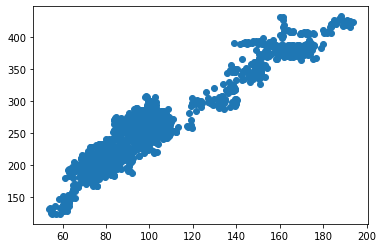

In [10]:
plt.figure()
plt.scatter(x, y)
plt.show()

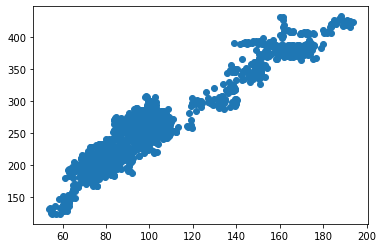

In [11]:
plt.subplots()
plt.scatter(x, y)
plt.show()

In [12]:
class hypothesis():
    """Модель парной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))
    
    def BGD(self, x, y):
        alpha = 0.00005
        d0 = sum(self.predict(x) - y) / len(x)
        d1 = sum((self.predict(x) - y) * x) / len(x)
        print(d0, d1)
        self.b0 -= alpha * d0
        self.b1 -= alpha * d1

In [13]:
hyp = hypothesis()
print(hyp.predict(0))
print(hyp.predict(100))
print("initial error", hyp.error(x, y))

0
0
initial error 36271.58344889084


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
---
y = 0 + 0 * x


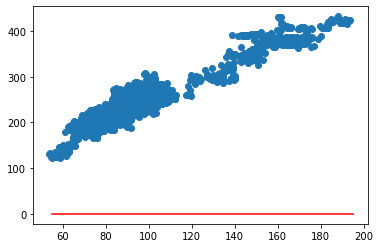

In [14]:
X0 = np.linspace(55, 195, 100)
Y0 = hyp.predict(X0)
print(Y0)
print("---")
print(f"y = {hyp.b0} + {hyp.b1} * x")
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [15]:
hyp.BGD(x, y)
print(f"y = {hyp.b0} + {hyp.b1} * x")
J = hyp.error(x, y)
print(J)

-261.8906655290106 -28813.890485438016
y = 0.013094533276450531 + 1.440694524271901 * x
6734.135540194945


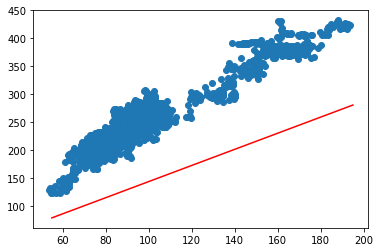

In [16]:
X0 = np.linspace(55, 195, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

In [17]:
print(hyp.b0)
print(hyp.b1)

0.013094533276450531
1.440694524271901


In [18]:
print(f'y = {hyp.b0} + {hyp.b1} * x')

y = 0.013094533276450531 + 1.440694524271901 * x


In [19]:
class hypothesis():
    """Модель парной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        
    def predict(self, x):
        return self.b0 + self.b1 * x
    
    def error(self, X, Y):
        return sum((self.predict(X) - Y) ** 2) / (2 * len(X))
    
    def BGD(self, x, y, alpha = 0.0000005, accuracy = 0.0001, max_steps = 500):
        steps, errors = [], []
        step = 0
        old_err = self.error(x, y)
        print(old_err)
        new_err = self.error(x, y) - 1
        print(new_err)
        dj = 1
        
        while dj > accuracy and step < max_steps:
            dj0 = sum(self.predict(x) - y) / len(x)
            dj1 = sum((self.predict(x) - y) * x) / len(x)
            self.b0 -= alpha * dj0
            self.b1 -= alpha * dj1
            old_err = new_err
            new_err = self.error(x, y)
            dj = abs(old_err - new_err)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [20]:
hyp = hypothesis()
steps, errors = hyp.BGD(x, y)
j = hyp.error(x, y)
print("error after GD:", j)

36271.58344889084
36270.58344889084
error after GD: 409.0238068408832


<function matplotlib.pyplot.show(close=None, block=None)>

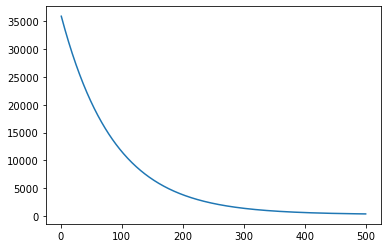

In [21]:
plt.figure()
plt.plot(steps, errors)
plt.show

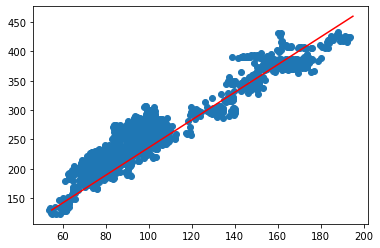

In [22]:
X0 = np.linspace(55, 195, 100)
Y0 = hyp.predict(X0)

plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

# Домашняя работа 

#### 1. Реализуйте механизм адаптивной скорости обучения.
#### 2. Постройте модель регрессии на другой паре инструментов.
#### 3. Модифицируйте класс регрессии так, чтобы он проводил обучение только на случайно выделенной части данных (обучающей выборке). Историю динамики ошибки отслеживать отдельно по обучающей и по тестовой выборке. 
#### 4. Научиться использовать библиотеку sklearn для построения парной линейной регрессии:
##### a. Изучить официальную документацию библиотеки sklearn: http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
##### б. По примеру программы регрессии, рассмотренной на семинаре, построить модель регрессии с использованием библиотечных средств
##### в. Сравнить результаты регрессии с использованием библиотечной функции и написанной самостоятельно.


In [23]:
plt.rcParams["figure.figsize"] = (15, 7)
sns.set_theme()

In [24]:
X = a['<CLOSE>_x']
y = a['<CLOSE>_y']

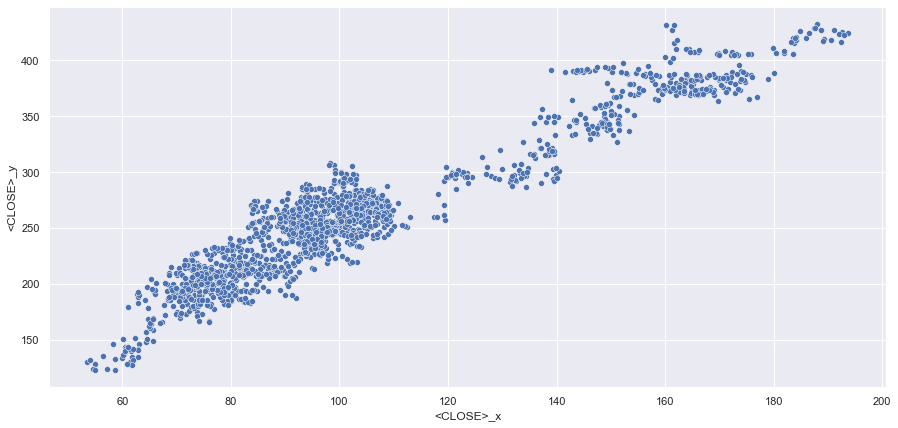

In [25]:
_ = sns.scatterplot(x=X, y=y)

In [26]:
class Hypothesis:

    def __init__(self):
        self._reset()

    def _reset(self):
        self.b0, self.b1 = 0, 0
        self._steps, self._train_metrics, self._test_metrics = [], [], []

    @property
    def steps(self):
        return self._steps[:]

    @property
    def n_steps(self):
        return len(self._steps)

    @property
    def train_metrics(self):
        return self._train_metrics[:]

    @property
    def test_metrics(self):
        return self._test_metrics[:]

    def BGD(
            self,
            X,
            y,
            alpha = 0.000001,
            accuracy = 0.0001,
            max_steps = 5000,
            train_size = None
    ):
        X_train, X_test, y_train, y_test = X, None, y, None
        if train_size:
            X_train, X_test, y_train, y_test = self.train_test_split(X, y, train_size=0.75)

        self._reset()
        metric, theta = 0, 1
        for i in range(max_steps):
            if theta < accuracy:
                return

            dy = self.predict(X_train) - y_train
            self.b0 -= alpha * np.mean(dy)
            self.b1 -= alpha * np.mean(dy * X_train)

            prev_metric = metric
            metric = self.mse(X_train, y_train)
            theta = np.abs(prev_metric - metric)

            self._steps.append(i)
            self._train_metrics.append(metric)

            if train_size and X_test is not None and y_test is not None:
                self._test_metrics.append(self.mse(X_test, y_test))

    def NAG(
            self,
            X,
            y,
            rho=0.9,
            alpha = 0.000001,
            accuracy = 0.0001,
            max_steps = 5000,
            train_size = None
    ):
        
        X_train, X_test, y_train, y_test = X, None, y, None
        if train_size:
            X_train, X_test, y_train, y_test = self.train_test_split(X, y, train_size=0.75)

        self._reset()
        metric, theta = 0, 1

        v0, v1 = 0, 0
        for i in range(max_steps):
            if theta < accuracy:
                return

            dy = self.predict(X_train) - y_train

            prev_v0, v0, db0 = self._move(alpha * np.mean(dy), v0, rho)
            self.b0 += db0

            prev_v1, v1, db1 = self._move(alpha * np.mean(dy * X_train), v1, rho)
            self.b1 += db1

            prev_metric = metric
            metric = self.mse(X_train, y_train)
            theta = np.abs(prev_metric - metric)

            self._steps.append(i)
            self._train_metrics.append(metric)

            if train_size and X_test is not None and y_test is not None:
                self._test_metrics.append(self.mse(X_test, y_test))

    @classmethod
    def _move(cls, gradient, v0, rho):
        prev_v0 = v0
        v0 = rho * v0 - gradient
        db = -prev_v0 * v0 + (1 + rho) * v0
        return prev_v0, v0, db

    def predict(self, X):
        return self.b0 + self.b1 * X

    def mse(self, X, y):
        return np.mean((self.predict(X) - y) ** 2)

    @classmethod
    def train_test_split(cls, X, y, test_size=None, train_size=None, random_state=None, shuffle=None):
        return train_test_split(
            X, y,
            test_size=test_size,
            train_size=train_size,
            random_state=random_state,
            shuffle=shuffle
        )

In [27]:
hypothesis = Hypothesis()

hypothesis.BGD(X, y, train_size=0.75)
BGD_n_steps, BGD_mse = hypothesis.n_steps, hypothesis.mse(X, y)

hypothesis.NAG(X, y, train_size=0.75)
NAG_n_steps, NAG_mse = hypothesis.n_steps, hypothesis.mse(X, y)

hyp_pred = hypothesis.predict(X)

print(f'{BGD_n_steps=}, {BGD_mse=}')
print(f'{NAG_n_steps=}, {NAG_mse=}')

BGD_n_steps=743, BGD_mse=597.3831692419053
NAG_n_steps=147, NAG_mse=597.3183107741885


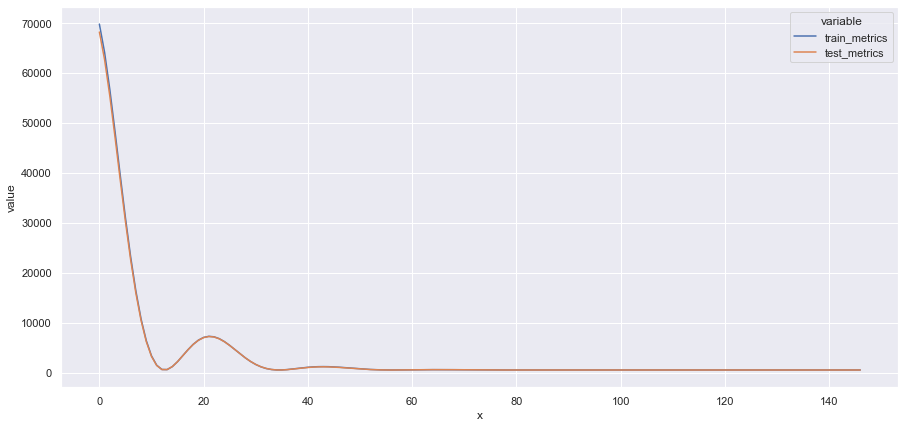

In [28]:
data = pd.DataFrame({
    'x': hypothesis.steps,
    'train_metrics': hypothesis.train_metrics,
    'test_metrics': hypothesis.test_metrics}
)
_ = sns.lineplot(data=data.melt('x'), x='x', y='value', hue='variable')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)
model = LinearRegression().fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))
sklearn_pred = model.predict(X.to_numpy().reshape(-1, 1))

r2_score(Hypothesis) = 0.8490265557548183
r2_score(LinearRegression) = 0.91109186239043


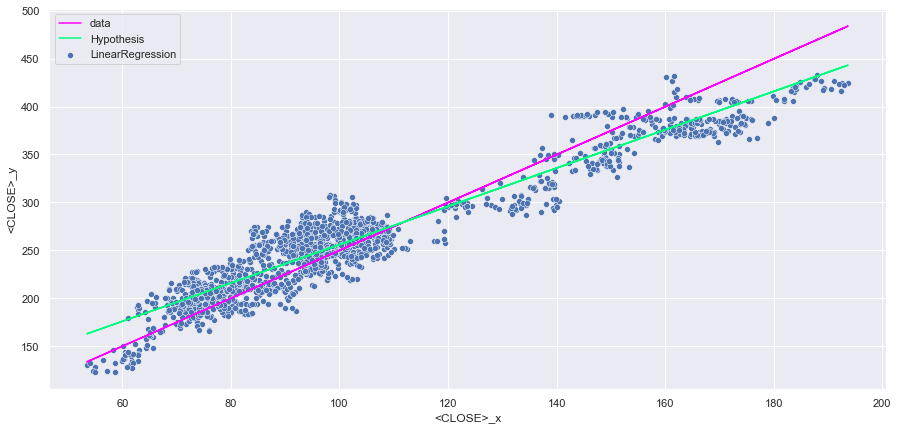

In [30]:
ax: Axes = sns.scatterplot(x=X, y=y)
ax.plot(X, hyp_pred, color='magenta')
ax.plot(X, sklearn_pred, color='springgreen')
ax.legend(['data', 'Hypothesis', 'LinearRegression'])
print(f'r2_score(Hypothesis) = {r2_score(y, hyp_pred)}')
print(f'r2_score(LinearRegression) = {r2_score(y, sklearn_pred)}')